## Imports

In [6]:
import math

import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Load data

In [22]:
factors_all_df = pd.read_csv('factors.csv')
# factors_all_df.reset_index(drop=True, inplace=True)
factors_all_df.index = factors_all_df['year']
factors_all_df.drop(columns=['year'], inplace=True)
factors_all_df

,ebike_sales,co2_per_cpt,ev_sales,pop,gas_price,env_perc,disp_inc,death_rate
year,,,,,,,,
2006,98,9.339,0,60846820,95.18,3,26088,395
2007,173,9.134,2,61322463,97.11,3,26167,381
2008,279,8.826,34,61806995,117.56,4,25460,372
2009,422,7.938,100,62276270,104.15,5,24180,346
2010,588,8.157,281,62766365,119.23,6,24758,336
2011,716,7.422,1207,63258810,138.81,7,24856,309
2012,854,7.640,2690,63700215,142.16,7,24711,305
2013,907,7.428,3800,64128273,140.59,7,24863,298
2014,1139,6.774,14700,64602298,133.47,10,25591,284


In [25]:
ebike_sales_df = factors_all_df['ebike_sales']
ebike_sales_df.columns = ['y']
# ebike_sales_df = ebike_sales_df[6:20]
ebike_sales_df

year
2006      98
2007     173
2008     279
2009     422
2010     588
2011     716
2012     854
2013     907
2014    1139
2015    1364
2016    1637
2017    2074
2018    2767
2019    3397
2020    4184
2021    4849
Name: ebike_sales, dtype: int64

## Graphing & Pre-Analysis

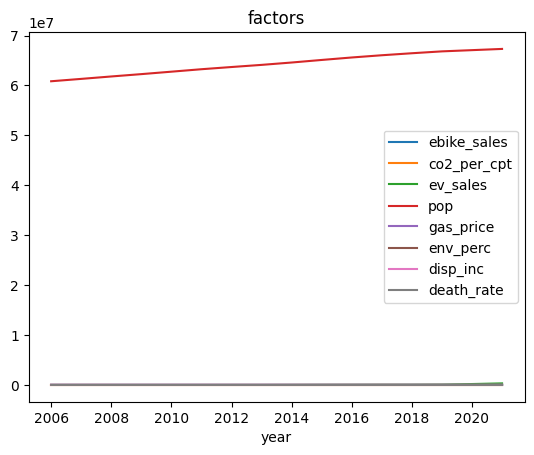

In [26]:
factors_gr = factors_all_df.plot(y=['ebike_sales', 'co2_per_cpt', 'ev_sales', 'pop', 'gas_price', 'env_perc', 'disp_inc', 'death_rate'],
                                 title='factors')

In [29]:
# normalize all columns to between 0 and 1
factors_norm_df = factors_all_df.copy()
for col in factors_norm_df.columns:
    factors_norm_df[col] = (factors_norm_df[col] - factors_norm_df[col].min()) / (factors_norm_df[col].max() - factors_norm_df[col].min())
factors_norm_df

,ebike_sales,co2_per_cpt,ev_sales,pop,gas_price,env_perc,disp_inc,death_rate
year,,,,,,,,
2006,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.535256,1.000000
2007,0.015786,0.954180,0.000006,0.073405,0.041081,0.000000,0.553342,0.900709
2008,0.038097,0.885338,0.000110,0.148181,0.476373,0.037037,0.391484,0.836879
2009,0.068196,0.686857,0.000323,0.220603,0.190932,0.074074,0.098443,0.652482
2010,0.103136,0.735807,0.000906,0.296238,0.511920,0.111111,0.230769,0.581560
2011,0.130078,0.571524,0.003894,0.372235,0.928693,0.148148,0.253205,0.390071
2012,0.159124,0.620250,0.008677,0.440356,1.000000,0.148148,0.220009,0.361702
2013,0.170280,0.572865,0.012258,0.506417,0.966582,0.148148,0.254808,0.312057
2014,0.219112,0.426688,0.047419,0.579572,0.815028,0.259259,0.421474,0.212766


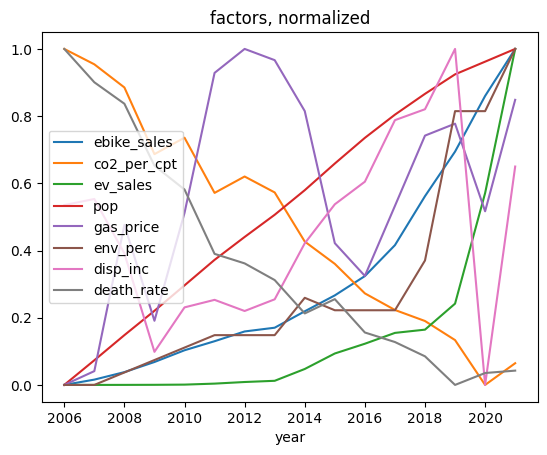

In [30]:
# plot all columns against year
factors_norm_gr = factors_norm_df.plot(y=['ebike_sales', 'co2_per_cpt', 'ev_sales', 'pop', 'gas_price', 'env_perc', 'disp_inc', 'death_rate'],
                                       title='factors, normalized')

In [31]:
# all other columns as difference against ebike_sales
factors_norm_diff_df = factors_norm_df.copy()
# subtract ebike_sales from all other columns
for col in factors_norm_diff_df.columns:
    if col != 'ebike_sales':
        factors_norm_diff_df[col] = factors_norm_diff_df[col] - factors_norm_diff_df['ebike_sales']

factors_norm_diff_df

,ebike_sales,co2_per_cpt,ev_sales,pop,gas_price,env_perc,disp_inc,death_rate
year,,,,,,,,
2006,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.535256,1.000000
2007,0.015786,0.938394,-0.015780,0.057618,0.025295,-0.015786,0.537556,0.884923
2008,0.038097,0.847240,-0.037988,0.110084,0.438276,-0.001060,0.353386,0.798782
2009,0.068196,0.618661,-0.067874,0.152407,0.122736,0.005878,0.030247,0.584286
2010,0.103136,0.632671,-0.102230,0.193101,0.408784,0.007975,0.127633,0.478424
2011,0.130078,0.441446,-0.126184,0.242157,0.798615,0.018070,0.123127,0.259993
2012,0.159124,0.461126,-0.150447,0.281231,0.840876,-0.010976,0.060885,0.202578
2013,0.170280,0.402586,-0.158022,0.336137,0.796302,-0.022132,0.084528,0.141777
2014,0.219112,0.207576,-0.171692,0.360460,0.595916,0.040147,0.202363,-0.006346


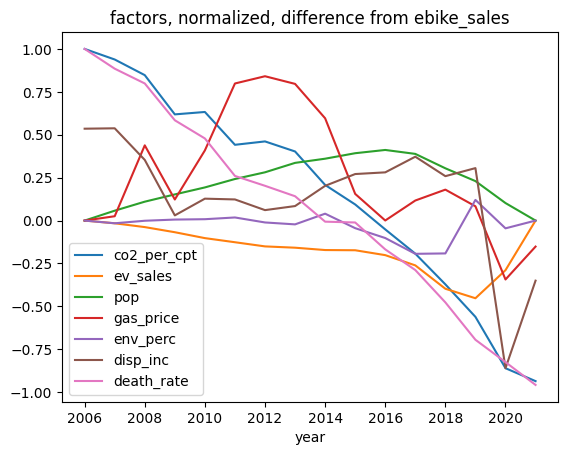

In [33]:
# plot all columns against year
factors_norm_diff_gr = factors_norm_diff_df.plot(y=['co2_per_cpt', 'ev_sales', 'pop', 'gas_price', 'env_perc', 'disp_inc', 'death_rate'],
                                                title='factors, normalized, difference from ebike_sales')

## Simple Bi variate Analysis

In [34]:
def bivariate_stats(x: pd.Series, y: pd.Series):
    _pmcc = x.corr(y)
    _covr = x.cov(y)

    print(
            f'PMCC: {_pmcc} \n'
            f'r^2:  {_pmcc ** 2} \n'
            f'Cov:  {_covr}'
    )


def univariate_graphs(x: pd.Series):
    pd.plotting.autocorrelation_plot(x)
    plt.show()


def linear_reg_func(m: LinearRegression):
    _coef = m.coef_[0][0]
    _itcp = m.intercept_[0]
    print(f'Linear Regressed: y = {_coef}x {"+" if abs(_itcp) == _itcp else "-"} {abs(_itcp)}')

In [36]:
def error_stats(x: pd.Series, y: pd.Series):
    _mse = metrics.mean_squared_error(x, y)
    _mae = metrics.mean_absolute_error(x, y)
    _mape = metrics.mean_absolute_percentage_error(x, y)
    _r2 = metrics.r2_score(x, y)

    print(
            f'MSE:  {_mse} \n'
            f'RMSE: {math.sqrt(_mse)} \n'
            f'R^2:  {_r2} \n'
            f'MAE:  {_mae} \n'
            f'MAPE: {_mape}%'
    )

# now, bivariate analyze each factor against ebike_sales


In [38]:
for col in factors_norm_df.columns:
    if col != 'ebike_sales':
        print(f'Factor: {col}')
        bivariate_stats(factors_norm_df[col], ebike_sales_df)
        print()


Factor: co2_per_cpt
PMCC: -0.900324769554498 
r^2:  0.81058469067336 
Cov:  -424.86597377440023

Factor: ev_sales
PMCC: 0.9019729211093598 
r^2:  0.8135551504145514 
Cov:  359.2178419354839

Factor: pop
PMCC: 0.9061357204440658 
r^2:  0.8210819438646861 
Cov:  440.3884110120109

Factor: gas_price
PMCC: 0.36326108141828206 
r^2:  0.13195861327317976 
Cov:  170.88132538668927

Factor: env_perc
PMCC: 0.9674335892080703 
r^2:  0.9359277495280094 
Cov:  442.89135802469127

Factor: disp_inc
PMCC: 0.32443529828957807 
r^2:  0.1052582627762475 
Cov:  132.40788308913307

Factor: death_rate
PMCC: -0.8003928888829077 
r^2:  0.6406287765743267 
Cov:  -385.8148936170212



# now, fit a polynomial to each factor against ebike_sales
then measure the error of the fit


In [42]:
# use normalized data
# use numpy polyfit
import numpy as np

for col in factors_norm_df.columns:
    if col != 'ebike_sales':
        print(f'Factor: {col}')
        _x = factors_norm_df[col]
        _y = ebike_sales_df
        _z = np.polyfit(_x, _y, 5)
        _p = np.poly1d(_z)
        print(f'Polyfit: {_p}')
        error_stats(_y, _p(_x))
        print()


Factor: co2_per_cpt
Polyfit:            5             4             3            2
1.285e+05 x - 3.366e+05 x + 3.049e+05 x - 1.03e+05 x + 1978 x + 4460
MSE:  56233.50651584464 
RMSE: 237.1360506457098 
R^2:  0.9723875162745532 
MAE:  190.43882656046134 
MAPE: 0.2827619948667851%

Factor: ev_sales
Polyfit:            5             4             3             2
7.383e+05 x - 1.337e+06 x + 7.177e+05 x - 1.338e+05 x + 1.941e+04 x + 428.8
MSE:  44790.339348680616 
RMSE: 211.637282511094 
R^2:  0.9780064841595072 
MAE:  170.31341989616928 
MAPE: 0.4440949391365396%

Factor: pop
Polyfit:       5        4             3        2
4683 x + 6972 x - 1.505e+04 x + 7765 x + 410.1 x + 99.99
MSE:  1443.1303236634685 
RMSE: 37.9885551668324 
R^2:  0.9992913759954729 
MAE:  29.064972380972172 
MAPE: 0.021484661354863835%

Factor: gas_price
Polyfit:            5             4             3            2
4.247e+04 x - 1.422e+05 x + 1.435e+05 x - 5.25e+04 x + 9185 x - 8.405
MSE:  1165051.4258004527 
RMSE: 1